In [ ]:
"""
Spearman rho und Trennschärfe Rechner.
Die AOPC Werte müssen manuell eingegeben werden als Dict.

zur Berechnung und plot werden spearmanr und matplotlib.pyplot importiert.
"""

Spearman's rho for subset size 100: 0.927
Spearman's rho for subset size 200: 0.952
Spearman's rho for subset size 400: 0.964
Spearman's rho for subset size 800: 1.000
Spearman's rho for subset size 1000: 1.000
Spearman's rho for subset size 2000: 1.000
Spearman's rho for subset size 3000: 1.000


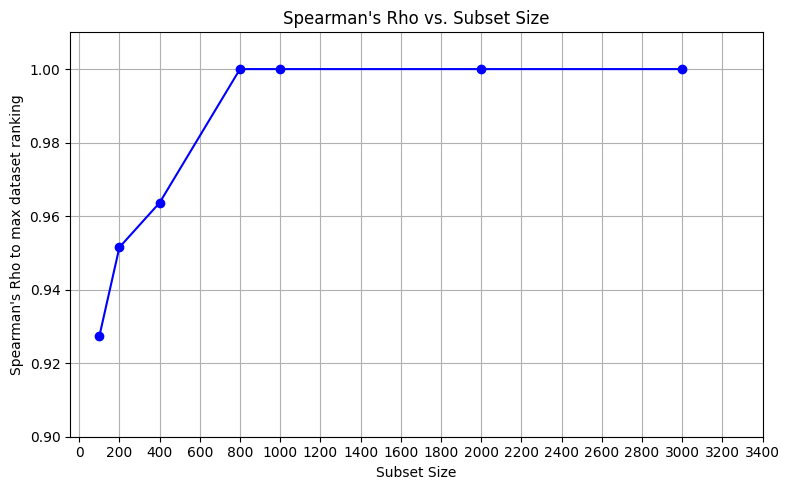

In [ ]:
#spearman rho für ds_test size.
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
# AOPC values per method per subset
aopc_scores = {
    '100': {
        'random': 0.443, 'gradient': 0.517, 'smoothgrad': 0.505, 'deconvnet': 0.408,
        'guided_backprop': 0.303, 'deep_taylor.bounded': 0.567, 'input_t_gradient': 0.554,
        'integrated_gradients': 0.543, 'lrp.z': 0.554, 'lrp.epsilon': 0.563,
    },
    '200': {
        'random': 0.442, 'gradient': 0.503, 'smoothgrad': 0.497, 'deconvnet': 0.388,
        'guided_backprop': 0.297, 'deep_taylor.bounded': 0.555, 'input_t_gradient': 0.553,
        'integrated_gradients': 0.539, 'lrp.z': 0.554, 'lrp.epsilon': 0.569,
    },
    '400': {
        'random': 0.442, 'gradient': 0.508, 'smoothgrad': 0.502, 'deconvnet': 0.388,
        'guided_backprop': 0.286, 'deep_taylor.bounded': 0.566, 'input_t_gradient': 0.565,
        'integrated_gradients': 0.541, 'lrp.z': 0.565, 'lrp.epsilon': 0.579,
    },
    '800': {
        'random': 0.444, 'gradient': 0.533, 'smoothgrad': 0.527, 'deconvnet': 0.405,
        'guided_backprop': 0.306, 'deep_taylor.bounded': 0.571, 'input_t_gradient': 0.581,
        'integrated_gradients': 0.551, 'lrp.z': 0.581, 'lrp.epsilon': 0.594,
    },
    '1000': {
        'random': 0.449, 'gradient': 0.527, 'smoothgrad': 0.521, 'deconvnet': 0.402,
        'guided_backprop': 0.301, 'deep_taylor.bounded': 0.567, 'input_t_gradient': 0.575,
        'integrated_gradients': 0.549, 'lrp.z': 0.575, 'lrp.epsilon': 0.588,
    },
    '2000': {
        'random': 0.446, 'gradient': 0.524, 'smoothgrad': 0.518, 'deconvnet': 0.402,
        'guided_backprop': 0.304, 'deep_taylor.bounded': 0.572, 'input_t_gradient': 0.578,
        'integrated_gradients': 0.550, 'lrp.z': 0.578, 'lrp.epsilon': 0.589,
    },
    '3000': {
        'random': 0.452, 'gradient': 0.528, 'smoothgrad': 0.522, 'deconvnet': 0.406,
        'guided_backprop': 0.311, 'deep_taylor.bounded': 0.580, 'input_t_gradient': 0.584,
        'integrated_gradients': 0.560, 'lrp.z': 0.584, 'lrp.epsilon': 0.595,
    },
    '3925': {
        'random': 0.446, 'gradient': 0.538, 'smoothgrad': 0.523, 'deconvnet': 0.415,
        'guided_backprop': 0.315, 'deep_taylor.bounded': 0.581, 'input_t_gradient': 0.586,
        'integrated_gradients': 0.560, 'lrp.z': 0.585, 'lrp.epsilon': 0.595,
    }

}

methods = list(aopc_scores['3925'].keys())
ref_ranks = sorted(methods, key=lambda m: -aopc_scores['3925'][m])
ref_rank_dict = {m: r+1 for r, m in enumerate(ref_ranks)}
ref_ranking = [ref_rank_dict[m] for m in methods]

subset_sizes = ['100', '200', '400','800', '1000', '2000','3000']
rho_values = []

for subset in subset_sizes:
    subset_ranks = sorted(methods, key=lambda m: -aopc_scores[subset][m])
    subset_rank_dict = {m: r+1 for r, m in enumerate(subset_ranks)}
    subset_ranking = [subset_rank_dict[m] for m in methods]

    rho, _ = spearmanr(ref_ranking, subset_ranking)
    rho_values.append(rho)

    print(f"Spearman's rho for subset size {subset}: {rho:.3f}")

plt.figure(figsize=(8, 5))
plt.plot([int(s) for s in subset_sizes], rho_values, marker='o', color='blue')
plt.title("Spearman's Rho vs. Subset Size")
plt.xlabel("Subset Size")
plt.ylabel("Spearman's Rho to max dataset ranking")
plt.ylim(0.9, 1.01)  # Extend y-axis slightly beyond 1.0 for visibility
plt.xticks(ticks=range(0, 3500, 200))  # More x-axis ticks
plt.grid(True)
plt.tight_layout()
plt.show()

Step	Spearman Rho
2	0,9515
4	0,9636
8	0,9636
16	1,0


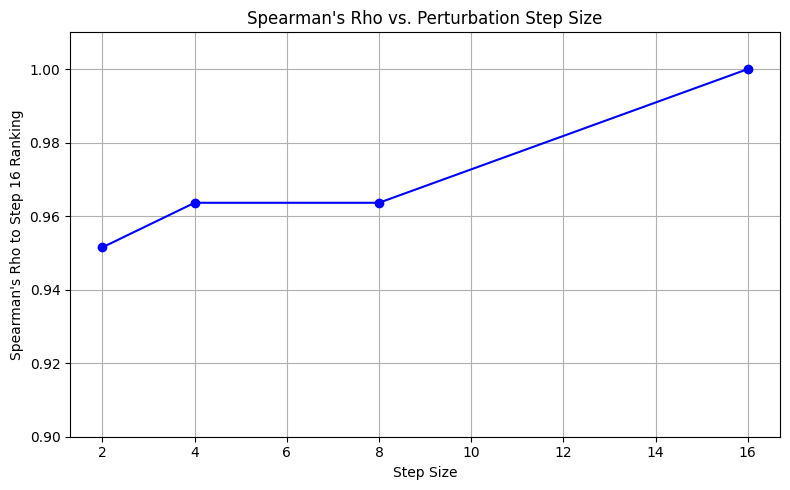

In [ ]:
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

step_data = {
    2: {
        'random': 0.017, 'gradient': 0.067, 'smoothgrad': 0.066, 'deconvnet': 0.010,
        'guided_backprop': 0.021, 'deep_taylor.bounded': 0.045, 'input_t_gradient': 0.069,
        'integrated_gradients': 0.059, 'lrp.z': 0.070, 'lrp.epsilon': 0.076
    },
    4: {
        'random': 0.051, 'gradient': 0.140, 'smoothgrad': 0.135, 'deconvnet': 0.024,
        'guided_backprop': 0.036, 'deep_taylor.bounded': 0.106, 'input_t_gradient': 0.152,
        'integrated_gradients': 0.127, 'lrp.z': 0.149, 'lrp.epsilon': 0.156
    },
    8: {
        'random': 0.122, 'gradient': 0.261, 'smoothgrad': 0.255, 'deconvnet': 0.071,
        'guided_backprop': 0.074, 'deep_taylor.bounded': 0.223, 'input_t_gradient': 0.282,
        'integrated_gradients': 0.242, 'lrp.z': 0.281, 'lrp.epsilon': 0.294
    },
    16: {
        'random': 0.327, 'gradient': 0.456, 'smoothgrad': 0.450, 'deconvnet': 0.264,
        'guided_backprop': 0.217, 'deep_taylor.bounded': 0.445, 'input_t_gradient': 0.460,
        'integrated_gradients': 0.430, 'lrp.z': 0.461, 'lrp.epsilon': 0.474
    }
}

# Methodenliste aus Referenz (Step 16)
methods = list(step_data[16].keys())
ref_ranks = sorted(methods, key=lambda m: -step_data[16][m])
ref_rank_dict = {m: r+1 for r, m in enumerate(ref_ranks)}
ref_ranking = [ref_rank_dict[m] for m in methods]

# Berechnung Spearman's Rho pro Step
rho_values = []
step_sizes = sorted(step_data.keys())

print("Step\tSpearman Rho".replace('.', ','))  # Für Excel
for step in step_sizes:
    step_ranks = sorted(methods, key=lambda m: -step_data[step][m])
    step_rank_dict = {m: r+1 for r, m in enumerate(step_ranks)}
    step_ranking = [step_rank_dict[m] for m in methods]

    rho, _ = spearmanr(ref_ranking, step_ranking)
    rho_values.append(rho)

    # Excel-kompatibler Output mit , statt . als Dezimaltrenner
    print(f"{step}\t{str(round(rho, 4)).replace('.', ',')}")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(step_sizes, rho_values, marker='o', color='blue')
plt.title("Spearman's Rho vs. Perturbation Step Size")
plt.xlabel("Step Size")
plt.ylabel("Spearman's Rho to Step 16 Ranking")
plt.ylim(0.9, 1.01)
plt.grid(True)
plt.tight_layout()
plt.show()



--- Correlation against Step 16 for: Ranking Stability (56x56 Filter) ---
Step	Spearman Rho
2	0.9515
4	0.9636
8	0.9636
16	1.0000


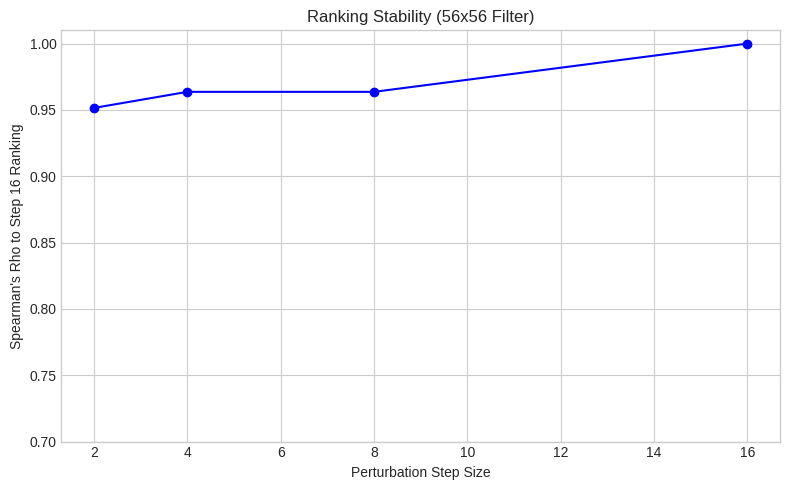


--- Correlation against Step 64 for: Ranking Stability (28x28 Filter) ---
Step	Spearman Rho
2	0.7707
4	0.8354
8	0.9025
16	0.8930
32	0.9512
64	1.0000


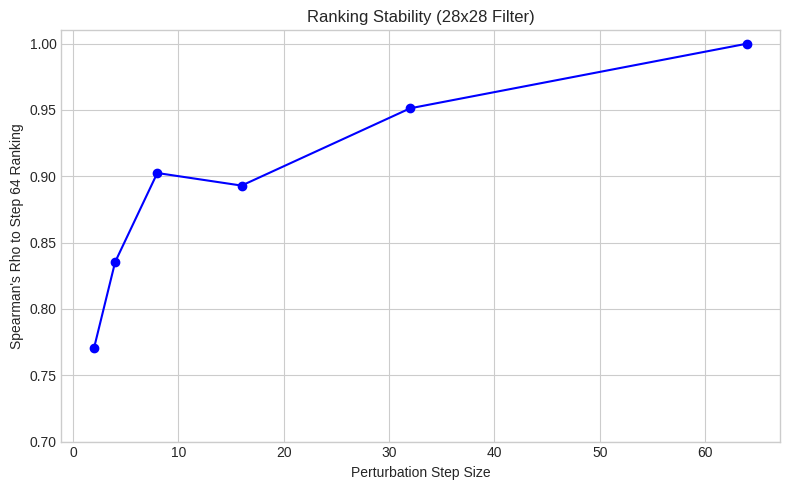

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# --- Data from the 'Step size analysis' (56x56 Filter) ---
data_56x56 = {
    # Step: {method: aopc_score}
    2: { 'random': 0.017, 'gradient': 0.067, 'smoothgrad': 0.066, 'deconvnet': 0.01, 'guided_backprop': 0.021, 'deep_taylor.bounded': 0.045, 'input_x_gradient': 0.069, 'integrated_gradient': 0.059, 'lrp.z': 0.07, 'lrp.e': 0.076 },
    4: { 'random': 0.066, 'gradient': 0.149, 'smoothgrad': 0.143, 'deconvnet': 0.036, 'guided_backprop': 0.05, 'deep_taylor.bounded': 0.113, 'input_x_gradient': 0.153, 'integrated_gradient': 0.134, 'lrp.z': 0.15, 'lrp.e': 0.159 },
    8: { 'random': 0.122, 'gradient': 0.261, 'smoothgrad': 0.255, 'deconvnet': 0.071, 'guided_backprop': 0.074, 'deep_taylor.bounded': 0.223, 'input_x_gradient': 0.282, 'integrated_gradient': 0.242, 'lrp.z': 0.281, 'lrp.e': 0.294 },
    16: { 'random': 0.327, 'gradient': 0.456, 'smoothgrad': 0.45, 'deconvnet': 0.264, 'guided_backprop': 0.217, 'deep_taylor.bounded': 0.445, 'input_x_gradient': 0.46, 'integrated_gradient': 0.43, 'lrp.z': 0.461, 'lrp.e': 0.474 }
}

# --- Data from the 'Filter size analysis' (28x28 Filter) ---
data_28x28 = {
    # Step: {method: aopc_score}
    2: { 'random': -0.002, 'gradient': 0.018, 'smoothgrad': 0.018, 'deconvnet': 0.003, 'guided_backprop': 0.011, 'deep_taylor.bounded': 0.015, 'input_x_gradient': 0.018, 'integrated_gradient': 0.021, 'lrp.z': 0.018, 'lrp.e': 0.02 },
    4: { 'random': 0.006, 'gradient': 0.045, 'smoothgrad': 0.044, 'deconvnet': 0.005, 'guided_backprop': 0.023, 'deep_taylor.bounded': 0.033, 'input_x_gradient': 0.046, 'integrated_gradient': 0.043, 'lrp.z': 0.047, 'lrp.e': 0.051 },
    8: { 'random': 0.024, 'gradient': 0.093, 'smoothgrad': 0.09, 'deconvnet': 0.02, 'guided_backprop': 0.04, 'deep_taylor.bounded': 0.073, 'input_x_gradient': 0.107, 'integrated_gradient': 0.096, 'lrp.z': 0.108, 'lrp.e': 0.118 },
    16: { 'random': 0.087, 'gradient': 0.183, 'smoothgrad': 0.178, 'deconvnet': 0.058, 'guided_backprop': 0.075, 'deep_taylor.bounded': 0.165, 'input_x_gradient': 0.223, 'integrated_gradient': 0.194, 'lrp.z': 0.223, 'lrp.e': 0.24 },
    32: { 'random': 0.208, 'gradient': 0.321, 'smoothgrad': 0.314, 'deconvnet': 0.17, 'guided_backprop': 0.133, 'deep_taylor.bounded': 0.35, 'input_x_gradient': 0.396, 'integrated_gradient': 0.353, 'lrp.z': 0.395, 'lrp.e': 0.414 },
    64: { 'random': 0.482, 'gradient': 0.566, 'smoothgrad': 0.565, 'deconvnet': 0.565, 'guided_backprop': 0.515, 'deep_taylor.bounded': 0.607, 'input_x_gradient': 0.636, 'integrated_gradient': 0.623, 'lrp.z': 0.636, 'lrp.e': 0.64 }
}


def create_stability_plot(step_data, plot_title):
    """
    Calculates and plots the Spearman's rho of method rankings for each step
    against the ranking of the final step.
    """
    # Get the list of methods from the first step (assumes all steps have the same methods)
    methods = list(step_data[next(iter(step_data))].keys())

    # Identify the final step to use as the reference for ranking
    reference_step = max(step_data.keys())

    # Create the reference ranking from the final step (higher AOPC is better)
    ref_scores = step_data[reference_step]

    # --- Calculate Spearman's Rho for each step against the reference ---
    rho_values = []
    step_sizes = sorted(step_data.keys())

    print(f"\n--- Correlation against Step {reference_step} for: {plot_title} ---")
    print("Step\tSpearman Rho")

    for step in step_sizes:
        current_scores = step_data[step]

        # Create ordered lists of scores for correlation calculation
        ref_score_list = [ref_scores[m] for m in methods]
        current_score_list = [current_scores[m] for m in methods]

        rho, _ = spearmanr(ref_score_list, current_score_list)
        rho_values.append(rho)
        print(f"{step}\t{rho:.4f}")

    # --- Plotting ---
    plt.figure(figsize=(8, 5))
    plt.plot(step_sizes, rho_values, marker='o', color="blue")
    plt.title(plot_title)
    plt.xlabel("Perturbation Step Size")
    plt.ylabel(f"Spearman's Rho to Step {reference_step} Ranking")
    plt.ylim(0.7, 1.01) # Zoom in on high correlation values
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# --- Generate the plots for both analyses ---
create_stability_plot(data_56x56, "Ranking Stability (56x56 Filter)")
create_stability_plot(data_28x28, "Ranking Stability (28x28 Filter)")

Analyse der Trennschärfe bei maximalen Schritten
Setup A (Filter 56x56, Steps: 16):
  - Standardabweichung (Trennschärfe): 0.0887
--------------------------------------------------
Setup B (Filter 28x28, Steps: 64):
  - Standardabweichung (Trennschärfe): 0.0522

 Plot wurde erfolgreich als 'trennschaerfe_vergleich.png' gespeichert.


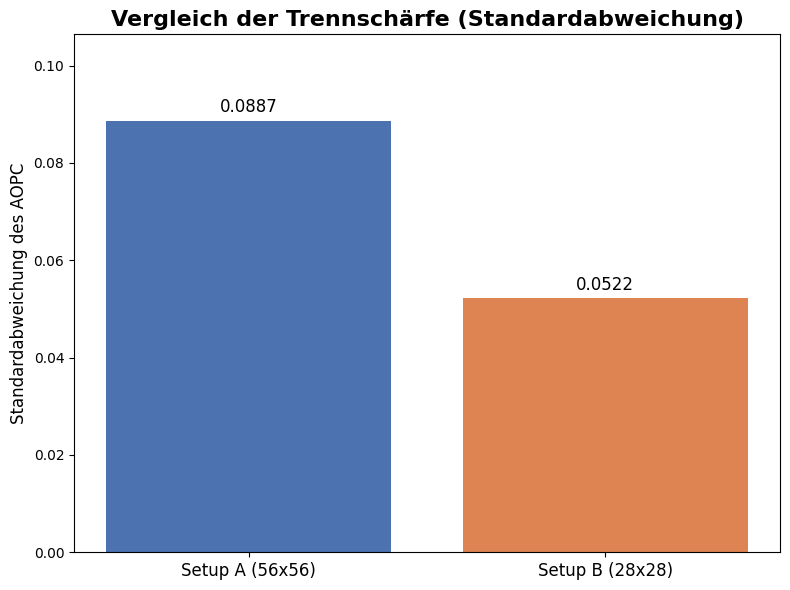

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data from your image for the maximum steps
# Setup A: Filter 56x56 at Steps: 16
aopc_56x56_max_steps = [
    0.327, 0.456, 0.450, 0.264, 0.217, 0.445, 0.460, 0.430, 0.461, 0.474
]

# Setup B: Filter 28x28 at Steps: 64
aopc_28x28_max_steps = [
    0.482, 0.566, 0.565, 0.555, 0.515, 0.607, 0.636, 0.623, 0.636, 0.640
]

# --- Calculation ---
std_dev_56x56 = np.std(aopc_56x56_max_steps)
std_dev_28x28 = np.std(aopc_28x28_max_steps)

# --- Print Results ---
print("Analyse der Trennschärfe bei maximalen Schritten")
print("=" * 50)
print(f"Setup A (Filter 56x56, Steps: 16):")
print(f"  - Standardabweichung (Trennschärfe): {std_dev_56x56:.4f}")
print("-" * 50)
print(f"Setup B (Filter 28x28, Steps: 64):")
print(f"  - Standardabweichung (Trennschärfe): {std_dev_28x28:.4f}")
print("=" * 50)

# --- Visualization ---
# Prepare data for the plot
labels = ['Setup A (56x56)', 'Setup B (28x28)']
values = [std_dev_56x56, std_dev_28x28]
bar_colors = ['#4c72b0', '#dd8452'] # Use distinct colors

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(labels, values, color=bar_colors)

# Add title and labels
ax.set_title('Vergleich der Trennschärfe (Standardabweichung)', fontsize=16, fontweight='bold')
ax.set_ylabel('Standardabweichung des AOPC', fontsize=12)
ax.set_ylim(bottom=0, top=max(values) * 1.2) # Set y-axis limit to give some space at the top
ax.tick_params(axis='x', labelsize=12)

# Add the value label on top of each bar
ax.bar_label(bars, fmt='%.4f', fontsize=12, padding=3)

# Improve layout and save the plot
plt.tight_layout()
plt.savefig("trennschaerfe_vergleich.png")

print("\n Plot wurde erfolgreich als 'trennschaerfe_vergleich.png' gespeichert.")